## Zhafran Farras Ghonim | 09011381722137

# Implementasi Logika Fuzzy Mamdani Dalam Game Simulasi Memancing 

### Logika Fuzzy
Fuzzy menurut bahasa artinya samar atau kabur. Suatu kata atau istilah dikatakan kabur apabila kata atau istilah tersebut tidak dapat didefinisikan secara tegas, dalam arti tidak dapat ditentukan secara tegas (benar atau salah) apakah suatu obyek tertentu memiliki ciri atau sifat yang diungkapkan oleh kata itu atau tidak. Logika fuzzy berarti perkiraan penalaran, informasi granulasi, komputasi dengan kata-kata dan sebagainya.

### Sistem Inferensi Fuzzy Mamdani
Sistem inferensi fuzzy metode Mamdani merupakan sistem inferensi yang sering digunakan. Sistem inferensi fuzzy dengan menggunakan metode Mamdani sering disebut dengan metode max-min. 

In [23]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

Fungsi Import adalah memanggil file lain kedalam satu file yang berbeda.

Numpy merupakan salah satu library yang digunakan oleh library lain seperti Scikit-Learn untuk keperluan analisis data.

skfuzzy atau scikit fuzzy adalah kumpulan algoritma logika Fuzzy yang digunakan dalam SciPy Stack, ditulis dalam bahasa komputasi Python.

Matplotlib adalah library paling banyak digunakan oleh data science untuk menyajikan datanya ke dalam visual yang lebih baik.


In [24]:
Kedalaman_Kail = ctrl.Antecedent(np.arange(0, 900, 0.5), 'Kedalaman Kail')
Jam_Pemancingan = ctrl.Antecedent(np.arange(0, 1440, 0.5), 'Jam Pemancingan')
Ikan = ctrl.Consequent(np.arange(0, 100, 0.5), 'Ikan')

Disini saya memakai logika fuzzy dalam game simulasi memancing, diatas adalah sebuah code yang berfungsi untuk menentukan Input 1, Input 2, dan Output. cara menentukan input adalah dengan mengetikkan perintah "ctrl.Antecedent". dan cara menetukan output dengan mengetikkan perintah "ctrl.Consequent".
Antecedent adalah variabel input/sensor. 

Consequent adalah Variabel ouput/control.


In [25]:
Kedalaman_Kail['Dangkal'] = fuzz.trapmf(Kedalaman_Kail.universe, [0, 0, 1, 500])
Kedalaman_Kail['Sedang'] = fuzz.trimf(Kedalaman_Kail.universe, [200, 500, 800])
Kedalaman_Kail['Dalam'] = fuzz.trimf(Kedalaman_Kail.universe, [500, 900, 900])

Dari data tersebut maka dibuatlah variabel kedalaman dengan semesta pembiraan [0-900],  dan dibagi menjadi 3 himpunan fuzzy yaitu [DANGKAL, SEDANG, DALAM]. Tiap himpunan fuzzy memiliki domain masing-masing. Variabel kedalaman kail pancing diukur dengan satuan sentimeter, yang domain nya antara 0 sampai 900. 100-400 sentimeter termasuk dangkal, 400-700 sentimeter termasuk sedang, dan 700 sentimeter lebih termasuk dalam.

In [26]:
Jam_Pemancingan['Malam'] = fuzz.trapmf(Jam_Pemancingan.universe, [0, 1, 120, 600])
Jam_Pemancingan['Siang'] = fuzz.trapmf(Jam_Pemancingan.universe, [120, 600, 840, 1320])
Jam_Pemancingan['Sore'] = fuzz.trapmf(Jam_Pemancingan.universe, [840, 1320, 1440, 1440])

Jam pemancingan diukur dalam satuan menit. Jika dalam satu jam terdapat 60 menit maka dalam satu hari terdapat 1440 menit. ikan [Diurnal] aktif antara jam [06.00-18.00] sedangkan ikan [Nokturnal] aktif pada jam [18.00-06.00]. Berdasarkan data tersebut berarti ikan diurnal aktif pada menit 360-1080, sedangkan nokturnal aktif pada menit 1080-1440 dan 0-360 dengan catatan menit 0 dimulai pada jam 00.00. Dari analisa tersebut maka dibuat variabel Jam pemancingan dengan semesta pembiraan [0-1440] dan dibagi menjadi 3 himpunan fuzzy yaitu [Malam, Siang, Sore].

In [27]:
Ikan['Diurnal'] = fuzz.trapmf(Ikan.universe, [0, 0, 1, 100])
Ikan['Nokturnal'] = fuzz.trimf(Ikan.universe, [1, 100, 100])

Data ikan yang digunakan pada game ini yaitu 29 ikan yang terdiri dari 15 ikan diurnal dan 14 ikan nokturnal. Untuk mempermudah dalam penentuan ikan yang didapat maka nilai maksimal dari variabel ikan ini dibuat 100.sehingga variabel ikan yang didapat mempunyai semesta pembiraan [0-100] dan dibagi menjadi 2 himpunan fuzzy yaitu [DIURNAL, NOKTURNAL].

C:\Users\Zhafran\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


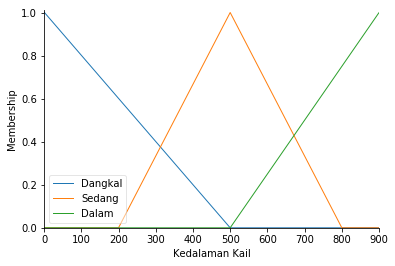

In [28]:
Kedalaman_Kail.view()

DANGKAL mempunyai domain [0-500] yang digmbarkan sebagai kurva linier turun, 

SEDANG mempunyai domain [200-800] yang digambarkan sebagai kurva segitiga dengan titik puncak pada kedalaman 500, dan 

DALAM mempunyai domain [500-900] yang digambarkan sebagai kurva linier naik.

C:\Users\Zhafran\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


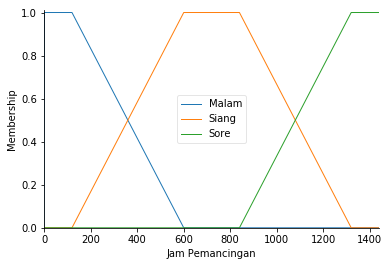

In [29]:
Jam_Pemancingan.view()

Himpunan fuzzy SIANG memiliki domain [120-1320] dan direpresentasikan sebagai kurva trapesium, dengan waktu interval [120-600] sebagai kurva linier naik, interval [600-840] kurva linier lurus dengan nilai keanggotaan 1, dan interval [840-1320] sebagai kurva linier turun. 

Himpunan fuzzy MALAM memiliki domain [0-600] yang direpresentasikan sebagai kurva trapezium, dengan waktu interval [0-120] sebagai kurva linier lurus dengan nilai keanggotaan 1, interval [120-600] sebagai kurva linier turun, 

Himpunan fuzzy SORE memiliki domain [840-1440] yang direpresentasikan sebagai kurva trapezium, dengan waktu interval [1320-1440] sebagai kurva linier lurus dengan nilai keanggotaan 1, dan interval [820-1320] sebagai kurva linier naik.

C:\Users\Zhafran\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


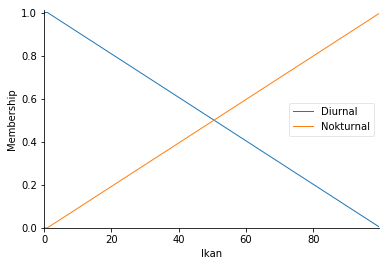

In [30]:
Ikan.view()

Himpunan fuzzy DIURNAL memiliki domain [0-100] yang direpresentasikan sebagai kurva linier turun.

Himpunan fuzzy NOKTURNAL memiliki domain [0-100] yang direpresentasikan sebagai kurva linier naik

Fuzzy rule base berisi pernyataan-pernyataan logika fuzzy (fuzzy statement), yang berbentuk pernyataan IF-THEN. Setelah dilakukan fuzzifikasi untuk setiap masukan dan keluaran, maka langkah berikutnya yaitu membuat aturan (rule base). Rule base ini terdiri dari kumpulan aturan yang berbasis logika fuzzy untuk menyatakan suatu kondisi. penyusunan rule base sangat berpengaruh pada presisi model, pada tahap pengambilan keputusan ditentukan berdasarkan rancangan rule base. aturan If-then yang dihubungkan dengan logika operasi AND dan OR.

In [36]:
rule1 = ctrl.Rule(Kedalaman_Kail['Dangkal'] & Jam_Pemancingan['Siang'], Ikan['Diurnal'])
rule2 = ctrl.Rule(Kedalaman_Kail['Dangkal'] & Jam_Pemancingan['Malam'], Ikan['Nokturnal'])
rule3 = ctrl.Rule(Kedalaman_Kail['Dangkal'] & Jam_Pemancingan['Sore'], Ikan['Diurnal'])
rule4 = ctrl.Rule(Kedalaman_Kail['Sedang'] & Jam_Pemancingan['Siang'], Ikan['Diurnal'])
rule5 = ctrl.Rule(Kedalaman_Kail['Sedang'] & Jam_Pemancingan['Malam'], Ikan['Nokturnal'])
rule6 = ctrl.Rule(Kedalaman_Kail['Sedang'] & Jam_Pemancingan['Sore'], Ikan['Nokturnal'])
rule7 = ctrl.Rule(Kedalaman_Kail['Dalam'] & Jam_Pemancingan['Siang'], Ikan['Diurnal'])
rule8 = ctrl.Rule(Kedalaman_Kail['Dalam'] & Jam_Pemancingan['Malam'], Ikan['Nokturnal'])
rule9 = ctrl.Rule(Kedalaman_Kail['Dalam'] & Jam_Pemancingan['Sore'], Ikan['Nokturnal'])

Diatas adalah perintah ctrl.rule() yang bertujuan untuk memasukan aturan aturan, disini teridiri dari 9 rule (aturan).

rule 1 = Jika kedalaman kail "Dangkal" dan jam "Siang" maka ikan yang didapat adalah "Diurnal"

rule 2 = Jika kedalaman kail "Dangkal" dan jam "Malam" maka ikan yang didapat adalah "Nokturnal"

rule 3 = Jika kedalaman kail "Dangkal" dan jam "Sore" maka ikan yang didapat adalah "Diurnal"

rule 4 = Jika kedalaman kail "Sedang" dan jam "Siang" maka ikan yang didapat adalah "Diurnal"

rule 5 = Jika kedalaman kail "Sedang" dan jam "Malam" maka ikan yang didapat adalah "Nokturnal"

rule 6 = Jika kedalaman kail "Sedang" dan jam "Sore" maka ikan yang didapat adalah "Nokturnal"

rule 7 = Jika kedalaman kail "Dalam" dan jam "Siang" maka ikan yang didapat adalah "Diurnal"

rule 8 = Jika kedalaman kail "Dalam" dan jam "Malam" maka ikan yang didapat adalah "Nokturnal"

rule 9 = Jika kedalaman kail "Dalam" dan jam "Sore" maka ikan yang didapat adalah "Nokturnal"

In [40]:
Ikan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

pada perintah ctrl.controlsystem() adalah, sebuah perintah untuk memasukan semua rule yang diatas, 

lalu untuk mengakulasi rule rule yang diatas dengan cara ketikan perintah ctrl.controlsystemsimulation. 

Kedalaman Kail :500
Jam Pemancing :360
49.75


C:\Users\Zhafran\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


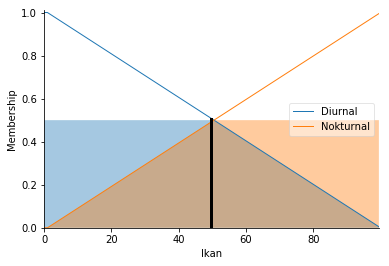

In [47]:
breaking = ctrl.ControlSystemSimulation(Ikan_ctrl)
breaking.input['Kedalaman Kail'] = int(input("Kedalaman Kail :"))
breaking.input['Jam Pemancingan'] = int(input("Jam Pemancing :"))
breaking.compute()
print(breaking.output['Ikan'])
Ikan.view(sim=breaking)
plt.show()

dari grafik diatas adalah pengambilan suatu inputan dan outpu, diatas dilihat bahwa input 1 dan 2 itu bernilai 500 dan 360, yang diamana menghasilkan nilai 49.75. lalu terbuatla grafik seperti diatas